In [15]:
MorphologyPath

'/home/fernando/CA1_netpyne/info/data-bbp/20191017/morphologies/swc/'

In [1]:
CircuitPath = '/home/fernando/CA1_netpyne/info/data-bbp/20191017/'
BioName = CircuitPath + 'bioname/'
Atlas = CircuitPath + 'atlas/'
MorphologyPath = CircuitPath + 'morphologies/swc/'
CellLibraryFile = CircuitPath + 'sonata/nodes/nodes_hippocampus.h5'
METypePath = CircuitPath + 'emodels/20190402/hoc/'
MEComboInfoFile = CircuitPath + 'emodels/20190402/mecombo_emodel.tsv'
UserTargetFile = CircuitPath + 'user.target'
StartTargetFile = CircuitPath + 'start.target'

In [2]:
cd ../sim

/home/fernando/CA1_netpyne/sim


In [4]:
import neuron
from neuron import h

h.load_file('import3d.hoc')
h.load_file('stdrun.hoc')
gid = 1
cellName = 'CA1_int_cAC_011017HP2_2019032814552'
MorphoName = '011017HP2.swc'
h.load_file('cells/hoc/' + cellName + '.hoc')
cell = getattr(h, cellName)(gid,MorphologyPath,MorphoName)

In [9]:
import numpy as np

In [11]:
def runneuron(cell):
    
    soma = cell.soma[0]

    BBPTraces = []
    BBPTracesList = []
    
    i=0
    for x in range(2):
        i=i+1   

        stimulus = neuron.h.IClamp(0.5, sec=soma)

        stimulus.dur = 400 # ms
        stimulus.delay = 300  # ms    
        
        stimulus.amp = 0.05*float(x)

        recordings = {}

        recordings['time'] = neuron.h.Vector()
        recordings['soma(0.5)'] = neuron.h.Vector()

        recordings['time'].record(neuron.h._ref_t, 0.1)
        recordings['soma(0.5)'].record(cell.soma[0](0.5)._ref_v, 0.1)

        neuron.h.dt = 0.05
        neuron.h.cvode_active(0)
        neuron.h.tstop = 1000 # ms
        neuron.h.run();

        time = np.array(recordings['time'])
        soma_voltage = np.array(recordings['soma(0.5)'])

        BBPTraces.append(soma_voltage)
        BBPTracesList.append(list(soma_voltage))
    
    return BBPTraces

In [12]:
BBPTraces = runneuron(cell)

Changed dt
Changed dt


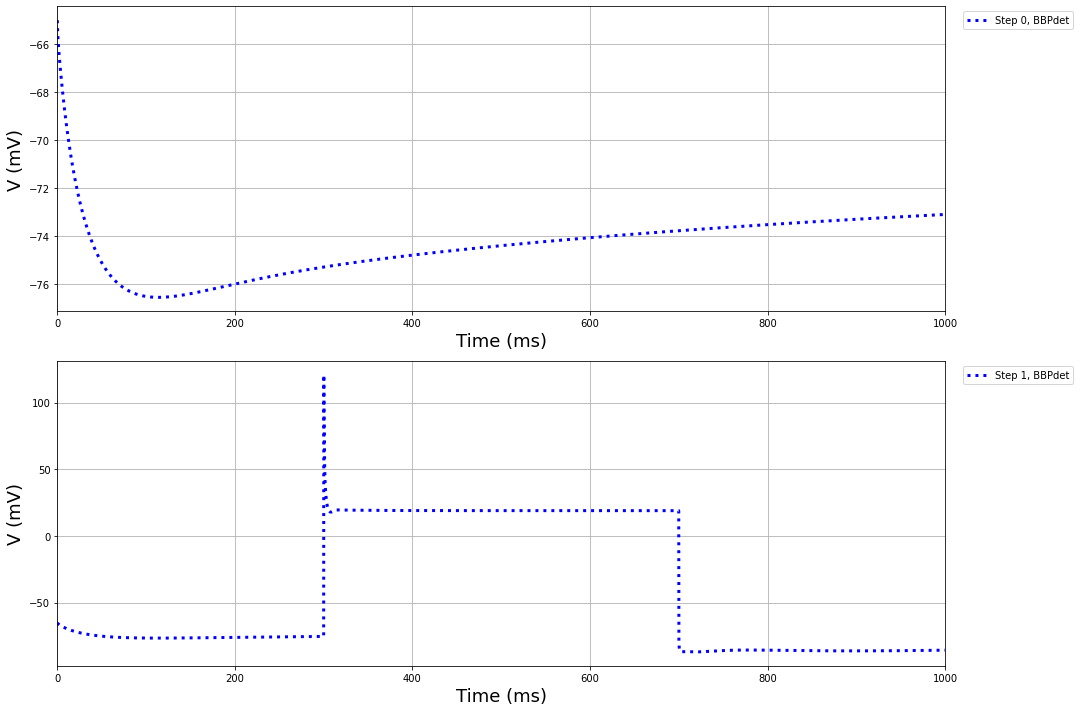

In [14]:
import matplotlib.pyplot as plt
# plot both traces overlayed
fontsiz=18
timeRange = [0, 1000]
recordStep = 0.1
# ~ ylim = [-100, 40]
figSize = (15,10)
fig = plt.figure(figsize=figSize)  # Open a new figure
 
t = np.arange(timeRange[0], timeRange[1]+recordStep, recordStep) 
 
for c in range(0,2):
	BBPTrace = BBPTraces[c]
	plt.subplot(2, 1, c+1)
	plt.ylabel('V (mV)', fontsize=fontsiz)
	plt.plot(t[:len(BBPTrace)], BBPTrace, linewidth=3.0, linestyle=':', color='blue', label='Step %d'%(int(c+0))+', BBPdet')  # linestyle=':'
	plt.xlabel('Time (ms)', fontsize=fontsiz)
	plt.xlim(0, 1000)
	# ~ plt.ylim(ylim)
	plt.grid(True)
	plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1.0))
plt.ion()
plt.tight_layout()
# ~ plt.savefig(outFolder+'/comparison_traces_soma_voltage_4steps_%s.png' % cellName)
# ~ print ("Figure Saved in %s/comparison_traces_soma_voltage_4steps_%s.png" % (outFolder,cellName))
# plt.savefig(rootFolder+'Figures-comparation/comparison_traces_soma_voltage_4steps_%s.png' % cellName)

In [ ]:
# from neuron.units import mV, ms
# import plotly
# import plotly.graph_objects as go

In [ ]:
# from neuron.units import mV, ms
# import plotly
# import plotly.graph_objects as go
# h.load_file("import3d.hoc")
# h.load_file("stdrun.hoc")

# gid = 6393 - 1
# gid = 0
# cellName = nodesinfo['model_template'][gid][4:]  
# mcName = nodesinfo['region'][gid][:3]  
# layerName = nodesinfo['region'][gid][4:]  
# MorphoName = MorphologyPath + nodesinfo['morphology'][gid] + '.swc'

# print('%s %s %s %s' % (mcName,layerName,cellName[:44],nodesinfo['morphology'][gid][:62]))


# cellmorpho = h.Import3d_SWC_read()
# cellmorpho.input(MorphoName)
# i3d = h.Import3d_GUI(cellmorpho, False)
# i3d.instantiate(None)

# ps = h.PlotShape(False)
# fig = ps.plot(plotly, line={"width": 12})

# fig.show()

In [2]:
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import json
import os

from bluepysnap import Circuit
from bluepysnap.bbp import Cell
circuit_path = CircuitPath + 'circuit_config.json'
circuit = Circuit(circuit_path)
cells = circuit.nodes["hippocampus_neurons"]

In [3]:
import h5py
f = h5py.File(CircuitPath + 'sonata/nodes/nodes.h5', 'r')
list(f['nodes']['hippocampus_neurons']['0']['model_template'][0:5])

[b'hoc:CA1_int_bAC_011127HP1_2019032911561',
 b'hoc:CA1_int_bAC_011127HP1_2019032911561',
 b'hoc:CA1_int_bAC_011127HP1_2019032911561',
 b'hoc:CA1_int_cAC_990611HP2_2019032816214',
 b'hoc:CA1_int_cAC_990611HP2_2019032816214']

## Cells info

In [4]:
nodesinfo = cells.get()
nodesinfo

,etype,layer,model_template,model_type,morph_class,morphology,mtype,region,rotation_angle_xaxis,rotation_angle_yaxis,rotation_angle_zaxis,synapse_class,x,y,z,@dynamics:holding_current,@dynamics:threshold_current
0,bAC,SLM,hoc:CA1_int_bAC_011127HP1_2019032911561,biophysical,INT,011127HP1_-_Scale_x1.000_y0.850_z1.000,SLM_PPA,mc5;SLM,-0.000000,0.306704,-0.000000,INH,409.446689,525.218483,1074.146619,0.028962,0.224609
1,bAC,SLM,hoc:CA1_int_bAC_011127HP1_2019032911561,biophysical,INT,011127HP1_-_Scale_x1.000_y0.850_z1.000,SLM_PPA,mc3;SLM,-3.141593,1.051681,-3.141593,INH,692.961402,511.187277,573.179832,0.028962,0.224609
2,bAC,SLM,hoc:CA1_int_bAC_011127HP1_2019032911561,biophysical,INT,011127HP1_-_Scale_x1.000_y0.850_z1.000,SLM_PPA,mc6;SLM,-3.141593,1.393882,-3.141593,INH,624.142630,520.641475,976.924721,0.028962,0.224609
3,cAC,SR,hoc:CA1_int_cAC_990611HP2_2019032816214,biophysical,INT,990611HP2,SR_SCA,mc5;SR,-3.141593,0.347655,-3.141593,INH,430.543380,411.999965,1180.185218,0.005140,0.341797
4,cAC,SR,hoc:CA1_int_cAC_990611HP2_2019032816214,biophysical,INT,990611HP2_-_Scale_x1.000_y1.050_z1.000,SR_SCA,mc5;SR,-0.000000,0.137277,-0.000000,INH,427.936977,302.239247,1013.453517,0.004947,0.341797
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18193,cNAC,SO,hoc:CA1_int_cNAC_970717D_2019030718251,biophysical,INT,980120A,SO_BP,mc3;SO,-3.141593,1.303866,-3.141593,INH,771.381002,37.274531,231.992286,-0.011643,0.302734
18194,cNAC,SO,hoc:CA1_int_cNAC_970911C_2019030512040,biophysical,INT,980120A_-_Scale_x1.000_y1.150_z1.000,SO_BP,mc3;SO,0.000000,-1.070015,0.000000,INH,666.970306,58.551145,396.539067,-0.044198,0.449219
18195,cNAC,SO,hoc:CA1_int_cNAC_970911C_2019030512040,biophysical,INT,980120A_-_Scale_x1.000_y0.850_z1.000_-_Clone_0,SO_BP,mc0;SO,-3.141593,1.267531,-3.141593,INH,505.811537,130.131875,182.700052,-0.044335,0.439453
18196,cNAC,SO,hoc:CA1_int_cNAC_990111HP2_2019032915570,biophysical,INT,980120A_-_Scale_x1.000_y1.150_z1.000,SO_BP,mc4;SO,-0.000000,0.815231,-0.000000,INH,-68.542249,57.960736,940.564725,-0.001224,0.371094


In [5]:
list(nodesinfo)

['etype',
 'layer',
 'model_template',
 'model_type',
 'morph_class',
 'morphology',
 'mtype',
 'region',
 'rotation_angle_xaxis',
 'rotation_angle_yaxis',
 'rotation_angle_zaxis',
 'synapse_class',
 'x',
 'y',
 'z',
 '@dynamics:holding_current',
 '@dynamics:threshold_current']

In [80]:
most_central_10_SP_PC = [11617, 6393, 6789, 6243, 13513, 14311, 9397, 3699, 12245, 12001]
most_central_10_SP_PC = most_central_10_SP_PC - np.ones_like(most_central_10_SP_PC)

SO_OLM_cells = [18039, 18040, 18041, 18042, 18043, 18044, 18045, 18046, 18047, 18048, 18049, 18050, 18051, 18052, 18053, 18054, 18055, 18056, 18057, 18058, 18059, 18060, 18061, 18062, 18063, 18064, 18065, 18066, 18067, 18068, 18069, 18070, 18071, 18072, 18073, 18074, 18075, 18076, 18077, 18078, 18079, 18080, 18081, 18082, 18083, 18084, 18085, 18086, 18087, 18088, 18089, 18090, 18091, 18092, 18093, 18094, 18095, 18096, 18097, 18098, 18099, 18100, 18101, 18102, 18103, 18104, 18105, 18106, 18107, 18108, 18109, 18110, 18111, 18112, 18113, 18114, 18115, 18116, 18117, 18118, 18119, 18120, 18121, 18122, 18123, 18124, 18125, 18126]
SO_OLM_cells = SO_OLM_cells - np.ones_like(SO_OLM_cells)
# most_central_10_SP_PC = range(18198)

for gid in SO_OLM_cells[:5]:
    MorphoName = MorphologyPath + nodesinfo['morphology'][gid] + '.swc'
    hocName = METypePath + nodesinfo['model_template'][gid][4:] + '.hoc'
    cellName = nodesinfo['model_template'][gid][4:]  
    mcName = nodesinfo['region'][gid][:3]  
    layerName = nodesinfo['region'][gid][4:]  
    print('%s %s %s %s' % (mcName,layerName,cellName[:44],nodesinfo['morphology'][gid][:62]))

print('hoclist size =',np.size(list(cells.property_values(Cell.MODEL_TEMPLATE))))
print('Morpholist size =',np.size(list(cells.property_values(Cell.MORPHOLOGY))))

mc4 SO CA1_int_cAC_011017HP2_2019032814552 011017HP2_height_15
mc5 SO CA1_int_cAC_011017HP2_2019032814552 011017HP2_height_150
mc3 SO CA1_int_cAC_011017HP2_2019032814552 011017HP2_height_150
mc5 SO CA1_int_cAC_011017HP2_2019032814552 011017HP2
mc3 SO CA1_int_cAC_011017HP2_2019032814552 011017HP2
hoclist size = 36
Morpholist size = 646


In [7]:
# from neuron import h
# from neuron.units import mV, ms
# import plotly
# import plotly.graph_objects as go
# h.load_file("import3d.hoc")
# h.load_file("stdrun.hoc")

# gid = 6393 - 1
# gid = 0
# cellName = nodesinfo['model_template'][gid][4:]  
# mcName = nodesinfo['region'][gid][:3]  
# layerName = nodesinfo['region'][gid][4:]  
# MorphoName = MorphologyPath + nodesinfo['morphology'][gid] + '.swc'

# print('%s %s %s %s' % (mcName,layerName,cellName[:44],nodesinfo['morphology'][gid][:62]))


# cellmorpho = h.Import3d_SWC_read()
# cellmorpho.input(MorphoName)
# i3d = h.Import3d_GUI(cellmorpho, False)
# i3d.instantiate(None)

# ps = h.PlotShape(False)
# fig = ps.plot(plotly, line={"width": 12})

# fig.show()

(array([2553., 2694., 2484., 2633., 2595., 2664., 2575.]),
 array([0.        , 0.85714286, 1.71428571, 2.57142857, 3.42857143,
        4.28571429, 5.14285714, 6.        ]),
 <BarContainer object of 7 artists>)

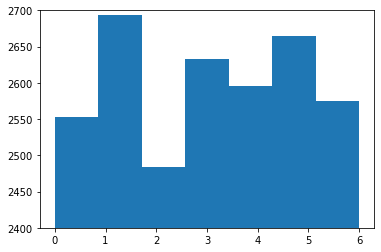

In [11]:
mcName = []
for gid in range(cells.size):
    mcName.append(int(nodesinfo['region'][gid][2:3]))  
plt.ylim(2400,2700)
plt.hist(mcName, bins = 7)

In [142]:
def distance3D(gidpre,gidpost):
    return np.sqrt(np.power(nodesinfo['x'][gidpre]-nodesinfo['x'][gidpost],2)+np.power(nodesinfo['y'][gidpre]-nodesinfo['y'][gidpost],2)+np.power(nodesinfo['z'][gidpre]-nodesinfo['z'][gidpost],2))

In [59]:
distance_3D = []           
nodex = []
nodez = []      
nodey = []    
nodemc = []
for gid in range(cells.size):    
    if nodesinfo['region'][gid][0:3]!='mcc':     
        nodex.append(nodesinfo['x'][gid])
        nodey.append(nodesinfo['y'][gid])
        nodez.append(nodesinfo['z'][gid])
        nodemc.append(int(nodesinfo['region'][gid][2:3]))
#         distance_3D.append(distance3D(gid,gidpost))  

In [60]:
print(np.max(nodex)-np.min(nodex),np.max(nodez)-np.min(nodez))

1197.7552169295802 1259.5194865417625


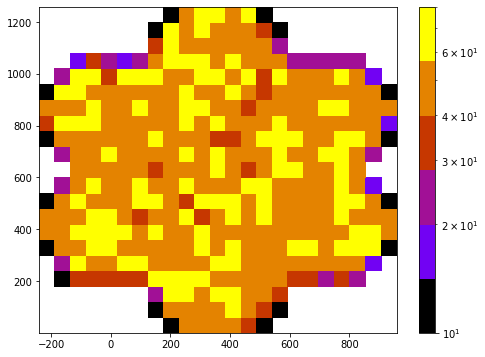

In [70]:
from matplotlib import colors
fig=plt.figure(figsize=(8,6))
plt.hist2d(nodex,nodez, bins=(23,21), cmap=plt.cm.get_cmap('gnuplot', 6), norm=colors.LogNorm());
plt.clim(10,80)
plt.colorbar();

## Import to NetPyNE

/home/fernando/CA1_netpyne/sim


In [8]:
cell

CA1_int_cAC_011017HP2_2019032814552[1]

In [2]:
from netpyne import specs, sim
%matplotlib inline

# Network parameters
netParams = specs.NetParams()  # object of class NetParams to store the network parameters

## Population parameters
netParams.popParams['Ca1'] = {'cellType': 'OLM', 'numCells': 1, 'cellModel': 'OLM'}

In [5]:
netParams.importCellParams(label='OLM_rule', conds= {'cellType': 'OLM', 'cellModel': 'OLM'}, 
                           fileName='cells/CA1_int_cAC_011017HP2_2019032814552.hoc', cellName='CA1_int_cAC_011017HP2_2019032814552')

NEURON: init not enough arguments
 near line 0
 ^
        CA1_int_cAC_011017HP2_2019032814552[0].init()


RuntimeError: hoc error

In [ ]:
netParams.importCellParams(label='OLM_rule', conds= {'cellType': 'OLM', 'cellModel': 'OLM'}, 
                           fileName='olm.hoc', cellName='INT_cAC_noljp', somaAtOrigin=somator)

netParams.synMechParams['PC-OLM'] = {'mod': 'DetAMPANMDA', 
                                      #'mod': 'ProbAMPANMDA_EMS', 'Nrrp': 1,
                                     'tau_d_AMPA': 1.7, 
                                     'tau_d_NMDA': 148.5, #'gmax': 0.0008, 
                                      #'tau_r_AMPA': 0.1, 'tau_r_NMDA': 10.0,
                                     'Use': olmuse, # - 0.08, 
                                     'Dep': olmdepfact, 
                                     'Fac': olmfacfact, 'NMDA_ratio': 0.28}


Start time:  2021-05-20 18:10:28.075208

Creating network of 10 cell populations on 1 hosts...
  Number of cells on node 0: 50 
  Done; cell creation time = 0.34 s.
Making connections...
  Number of connections on node 0: 319 
  Number of synaptic contacts on node 0: 322 
  Done; cell connection time = 0.04 s.
Adding stims...
  Number of stims on node 0: 50 
  Done; cell stims creation time = 0.01 s.
Recording 10 traces of 1 types on node 0

Running simulation for 1000.0 ms...
  Done; run time = 50.24 s; real-time ratio: 0.02.

Gathering data...
  Done; gather time = 0.30 s.

Analyzing...
  Cells: 50
  Connections: 369 (7.38 per cell)
  Synaptic contacts: 372 (7.44 per cell)
  Spikes: 3109 (62.18 Hz)
  Simulated time: 1.0 s; 1 workers
  Run time: 50.24 s
  Done; saving time = 0.01 s.
Plotting raster...


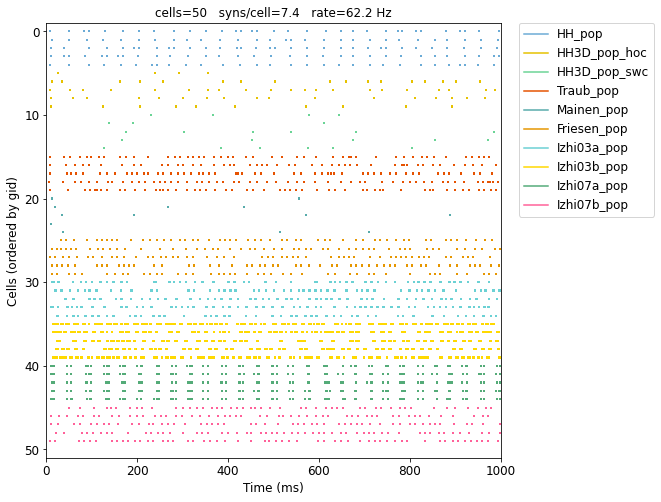

Plotting recorded cell traces ... cell


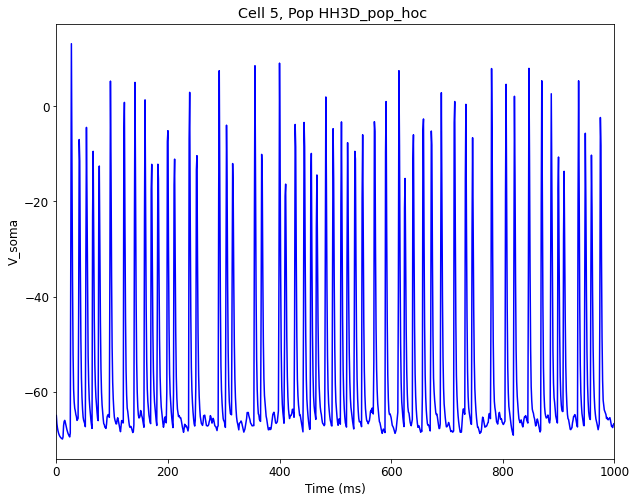

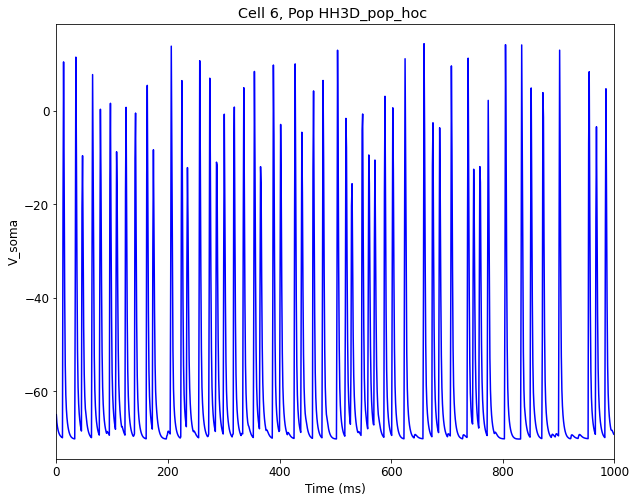

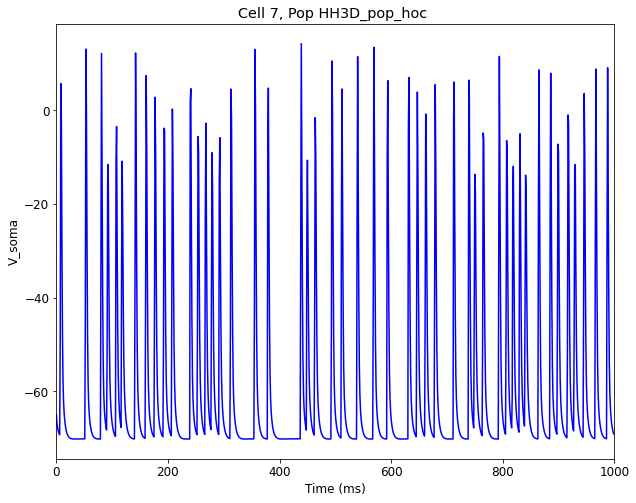

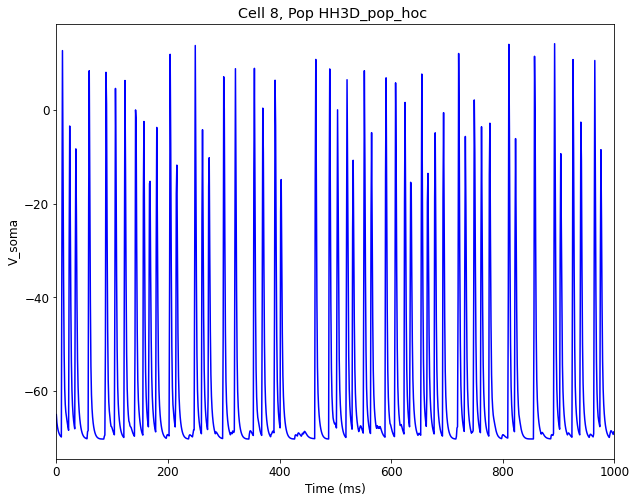

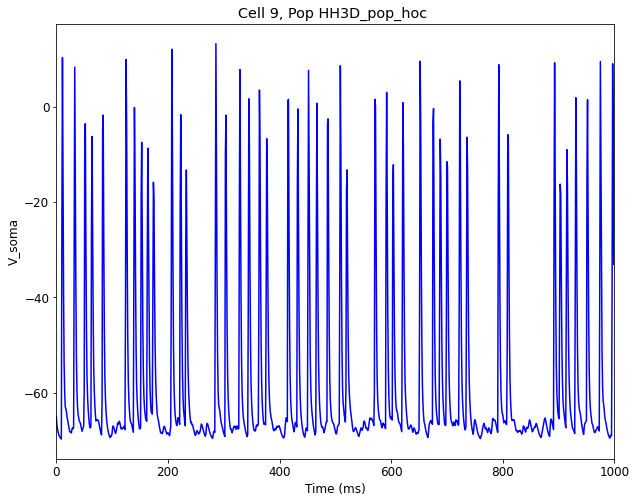

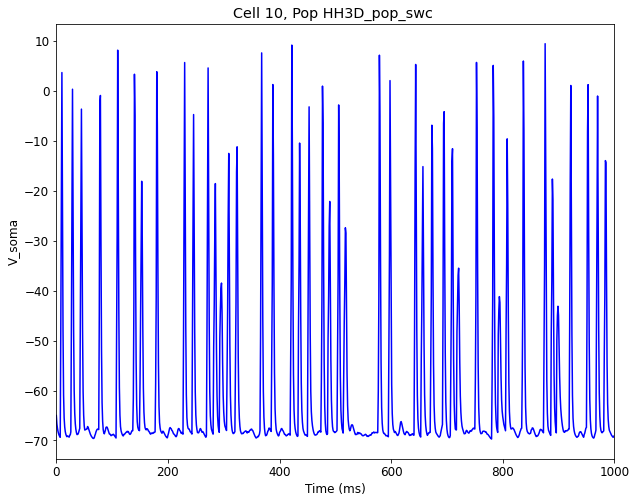

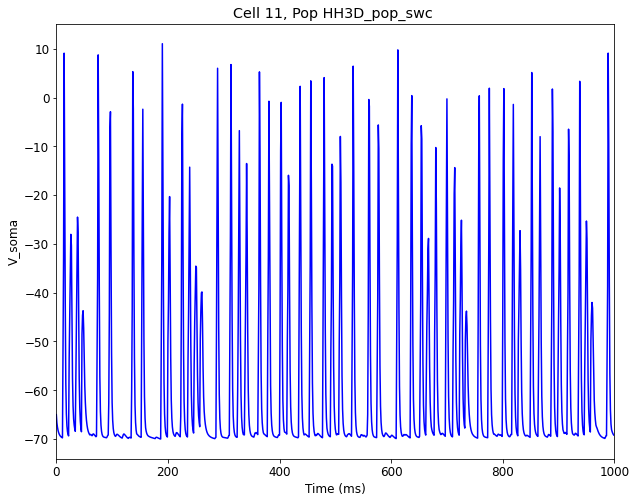

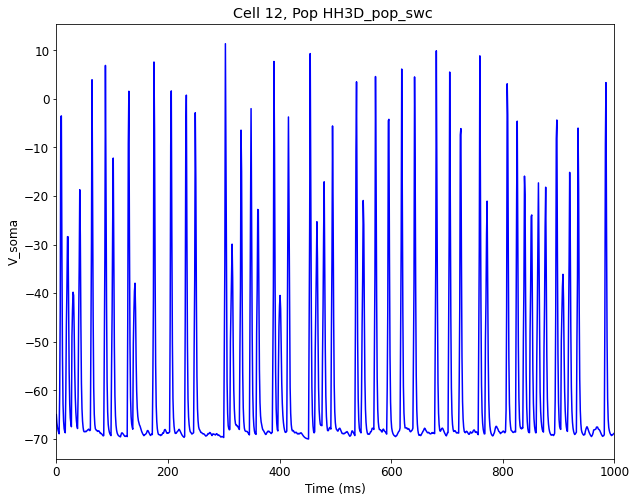

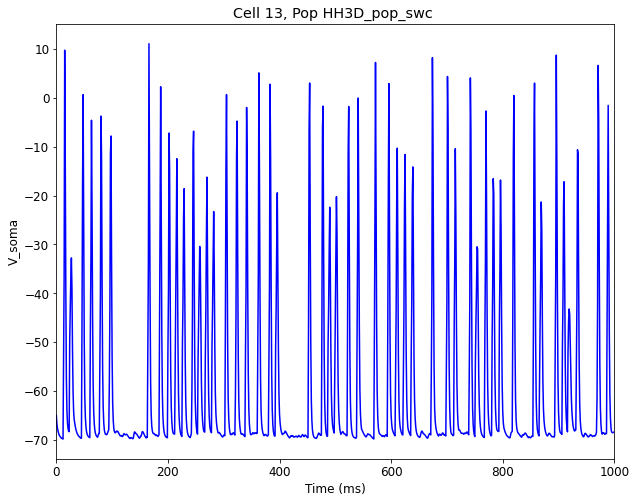

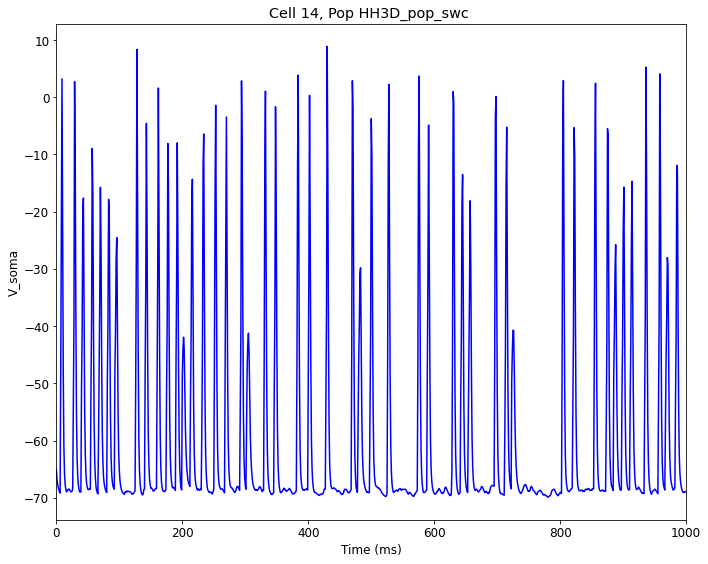

  Done; plotting time = 2.96 s

Total time = 53.92 s

End time:  2021-05-20 18:11:21.993169


In [6]:
from netpyne import specs, sim
%matplotlib inline

# Network parameters
netParams = specs.NetParams()  # object of class NetParams to store the network parameters

## Population parameters
netParams.popParams['HH_pop'] = {'cellType': 'PYR', 'numCells': 5, 'cellModel': 'HHpy'}
netParams.popParams['HH3D_pop_hoc'] = {'cellType': 'PYR', 'numCells': 5, 'cellModel': 'HH3D_hoc'}
netParams.popParams['HH3D_pop_swc'] = {'cellType': 'PYR', 'numCells': 5, 'cellModel': 'HH3D_swc'}
netParams.popParams['Traub_pop'] = {'cellType': 'PYR', 'numCells': 5, 'cellModel': 'Traub'}
netParams.popParams['Mainen_pop'] = {'cellType': 'PYR', 'numCells': 5, 'cellModel': 'Mainen'}

### HH
netParams.importCellParams(
    label='PYR_HH_rule', 
    conds={'cellType': 'PYR', 'cellModel': 'HHpy'},
    fileName='HHCellFile.py', 
    cellName='HHCellClass', 
    importSynMechs=True,
    )


### HH3D HOC
cellRule = netParams.importCellParams(
    label='PYR_HH3D_hoc_rule', 
    conds={'cellType': 'PYR', 'cellModel': 'HH3D_hoc'},
    fileName='geom.hoc', 
    cellName='E21', 
    importSynMechs=False,
    )
cellRule['secs']['soma']['mechs']['hh'] = {'gnabar': 0.12, 'gkbar': 0.036, 'gl': 0.003, 'el': -70}
for secName in cellRule['secs']:
    cellRule['secs'][secName]['mechs']['pas'] = {'g': 0.0000357, 'e': -70}
    cellRule['secs'][secName]['geom']['cm'] = 1


### HH3D SWC
cellRule = netParams.importCellParams(
    label='PYR_HH3D_swc_rule', 
    conds={'cellType': 'PYR', 'cellModel': 'HH3D_swc'},
    fileName='BS0284.swc', 
    cellName='BS0284',
    )
netParams.renameCellParamsSec('PYR_HH3D_swc_rule', 'soma_0', 'soma')  # rename imported section 'soma_0' to 'soma'
for secName in cellRule['secs']:
    cellRule['secs'][secName]['mechs']['pas'] = {'g': 0.0000357, 'e': -70}
    cellRule['secs'][secName]['geom']['cm'] = 1
    if secName.startswith('soma'):
        cellRule['secs'][secName]['mechs']['hh'] = {'gnabar': 0.12, 'gkbar': 0.036, 'gl': 0.003, 'el': -70}


### Traub
cellRule = netParams.importCellParams(
    label='PYR_Traub_rule', 
    conds={'cellType': 'PYR', 'cellModel': 'Traub'},
    fileName='pyr3_traub.hoc', 
    cellName='pyr3',
    )
somaSec = cellRule['secLists']['Soma'][0]
cellRule['secs'][somaSec]['spikeGenLoc'] = 0.5


### Mainen
netParams.importCellParams(
    label='PYR_Mainen_rule', 
    conds={'cellType': 'PYR', 'cellModel': 'Mainen'},
    fileName='mainen.py', 
    cellName='PYR2',
    )


### Friesen
cellRule = netParams.importCellParams(
    label='PYR_Friesen_rule', 
    conds={'cellType': 'PYR', 'cellModel': 'Friesen'},
    fileName='friesen.py', 
    cellName='MakeRSFCELL',
    )
cellRule['secs']['axon']['spikeGenLoc'] = 0.5


### Izhi2003a (independent voltage)
cellRule = netParams.importCellParams(
    label='PYR_Izhi03a_rule', 
    conds={'cellType': 'PYR', 'cellModel':'Izh2003a'},
    fileName='izhi2003Wrapper.py', 
    cellName='IzhiCell',
    cellArgs={'type':'tonic spiking', 'host':'dummy'},
    )
netParams.renameCellParamsSec('PYR_Izhi03a_rule', 'sec', 'soma')  # rename imported section 'sec' to 'soma'
cellRule['secs']['soma']['pointps']['Izhi2003a_0']['vref'] = 'V' # specify that uses its own voltage V


### Izhi2003b (section voltage)
netParams.importCellParams(
    label='PYR_Izhi03b_rule', 
    conds={'cellType': 'PYR', 'cellModel':'Izh2003b'},
    fileName='izhi2003Wrapper.py', 
    cellName='IzhiCell',  
    cellArgs={'type':'tonic spiking'},
    )


### Izhi2007a (independent voltage)
cellRule = netParams.importCellParams(
    label='PYR_Izhi07a_rule', 
    conds={'cellType': 'PYR', 'cellModel':'Izh2007a'},
    fileName='izhi2007Wrapper.py', 
    cellName='IzhiCell',  
    cellArgs={'type':'RS', 'host':'dummy'},
    )
netParams.renameCellParamsSec('PYR_Izhi07a_rule', 'sec', 'soma')  # rename imported section 'sec' to 'soma'
cellRule['secs']['soma']['pointps']['Izhi2007a_0']['vref'] = 'V' # specify that uses its own voltage V
cellRule['secs']['soma']['pointps']['Izhi2007a_0']['synList'] = ['AMPA', 'NMDA', 'GABAA', 'GABAB']  # specify its own synapses


### Izhi2007b (section voltage)
netParams.importCellParams(
    label='PYR_Izhi07b_rule', 
    conds={'cellType': 'PYR', 'cellModel':'Izh2007b'},
    fileName='izhi2007Wrapper.py', 
    cellName='IzhiCell',  
    cellArgs={'type':'RS'},
    )


## Synaptic mechanism parameters
netParams.synMechParams['AMPA'] = {'mod': 'Exp2Syn', 'tau1': 1.0, 'tau2': 5.0, 'e': 0}  # soma NMDA synapse


# Stimulation parameters
netParams.stimSourceParams['bkg'] = {'type': 'NetStim', 'rate': 50, 'noise': 0.5}
netParams.stimTargetParams['bg1'] = {'source': 'bkg', 'conds': {'cellType': 'PYR', 'cellModel': ['Traub', 'HH', 'HH3D_hoc', 'HH3D_swc', 'Mainen', 'Izh2003b', 'Izh2007b']}, 'weight': 0.1, 'delay': 5, 'sec': 'soma'}
netParams.stimTargetParams['bg2'] = {'source': 'bkg', 'conds': {'cellType': 'PYR', 'cellModel': ['Friesen','Izh2003a', 'Izh2007a']}, 'weight': 5, 'delay': 5, 'sec': 'soma'}


## Connectivity params
netParams.connParams['recurrent'] = {
    'preConds': {'cellType': 'PYR'}, 
    'postConds': {'cellType': 'PYR'},  #  PYR -> PYR random
    'connFunc': 'convConn',           # connectivity function (random)
    'convergence': 'uniform(0,10)',   # max number of incoming conns to cell
    'weight': 0.001,                  # synaptic weight
    'delay': 5,                       # transmission delay (ms)
    'sec': 'soma'}                    # section to connect to

netParams.connParams['HH->izhi07a'] = {
    'preConds': {'pop': 'HH_pop'}, 
    'postConds': {'pop': 'Izhi07a_pop'}, # background -> PYR (weight=0.1)
    'connFunc': 'fullConn',     # connectivity function (all-to-all)
    'weight': 5,                # synaptic weight
    'delay': 5,                 # transmission delay (ms)
    'sec': 'soma'}              # section to connect to

netParams.connParams['izhi07a->HH'] = {
    'preConds': {'pop': 'Izhi07a_pop'}, 
    'postConds': {'pop': 'HH_pop'}, # background -> PYR (weight=0.1)
    'connFunc': 'fullConn',     # connectivity function (all-to-all)
    'weight': 0.1,              # synaptic weight
    'delay': 5,                 # transmission delay (ms)
    'sec': 'soma'}              # section to connect to


# Simulation options
simConfig = specs.SimConfig()       # object of class SimConfig to store simulation configuration
simConfig.duration = 1*1e3          # Duration of the simulation, in ms
simConfig.dt = 0.025                # Internal integration timestep to use
simConfig.verbose = False           # Show detailed messages
simConfig.recordTraces = {'V_soma': {'sec': 'soma', 'loc': 0.5, 'var': 'v'}}
simConfig.recordStep = 1            # Step size in ms to save data (eg. V traces, LFP, etc)
simConfig.filename = 'model_output' # Set file output name
simConfig.savePickle = False        # Save params, network and sim output to pickle file
simConfig.analysis['plotRaster'] = {'orderInverse': True, 'saveFig': 'tut_import_raster.png'}           
simConfig.analysis['plotTraces'] = {'include': ['HH3D_pop_hoc', 'HH3D_pop_swc']}            


# Create network and run simulation
sim.createSimulateAnalyze(netParams = netParams, simConfig = simConfig)


In [7]:
!rm -r x86_64


In [9]:
sim.net.pops['HH_pop'].tags

ODict([('cellType', 'PYR'),
       ('numCells', 5),
       ('cellModel', 'HH'),
       ('pop', 'HH_pop')])